# 1A.algo - filtre de Sobel

Le filtre de [Sobel](https://fr.wikipedia.org/wiki/Filtre_de_Sobel) est utilisé pour calculer des gradients dans une image. L'image ainsi filtrée révèle les forts contrastes.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Exercice 1 : application d'un filtre

Le filtre de [Sobel](http://fr.wikipedia.org/wiki/Filtre_de_Sobel) est un filtre qu'on applique à une image pour calculer le gradient d'une image afin de déterminer les contours qui s'y trouve. Le filtre de [Canny](http://fr.wikipedia.org/wiki/Filtre_de_Canny) permet de flouter une image. Dans un premier temps, on cherchera à appliquer un filtre 3x3 : 

$\left( \begin{array}{ccc} 1&1&1 \\ 1&1&1 \\ 1&1&1 \end{array} \right)$

Qu'on applique au voisinage 3x3 du pixel $p_5$ :

$\left( \begin{array}{ccc} p_1&p_2&p_3 \\ p_4&p_5&p_6 \\ p_7&p_8&p_9 \end{array} \right)$

Après l'application du filtre à ce pixel, le résultat devient :

$\left( \begin{array}{ccc}  ?&?&? \\ ?& \sum_{i=1}^9 p_i &? \\ ?&?&? \end{array} \right)$

On veut maintenant appliquer ce filtre sur l'image suivante :

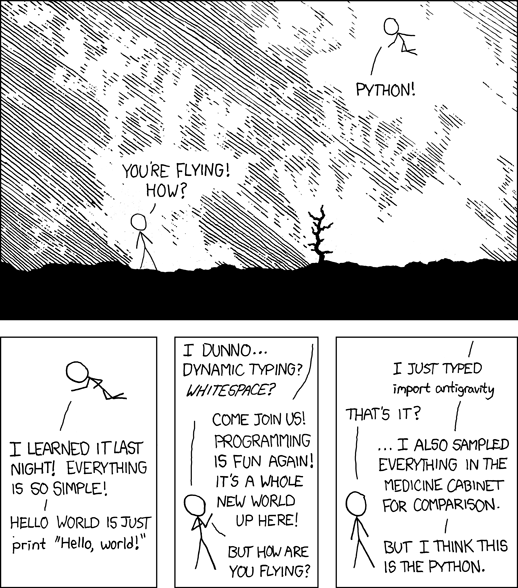

In [2]:
from pyquickhelper.loghelper import noLOG
from pyensae.datasource import download_data
f = download_data("python.png", url="http://imgs.xkcd.com/comics/")
from IPython.display import Image
Image("python.png")

Mais avant de pouvoir faire des calculs dessus, il faut pouvoir convertir l'image en un tableau ``numpy`` avec la fonction [numpy.asarray](http://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html).

In [3]:
import PIL
import PIL.Image
im = PIL.Image.open("python.png")
from PIL.ImageDraw import Draw
import numpy
tab = numpy.asarray(im).copy()
tab.flags.writeable = True  # afin de pouvoir modifier l'image
"dimension",tab.shape, " type", type(tab[0,0])

('dimension', (588, 518), ' type', numpy.uint8)

Une fois les calculs effectués, il faut convertir le tableau ``numpy`` en image. On peut par exemple blanchir tout une partie de l'image et l'afficher.

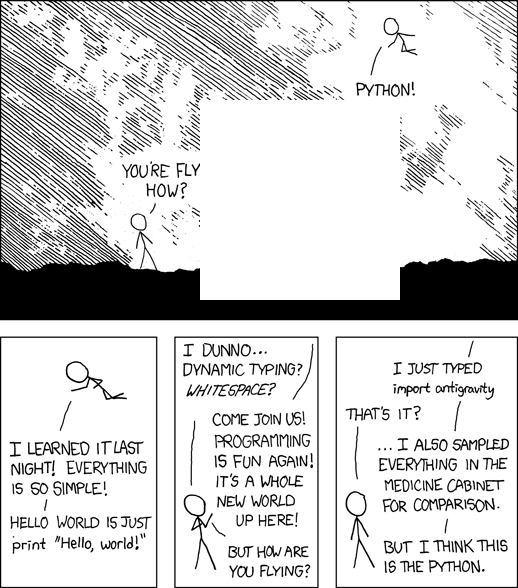

In [4]:
tab[100:300,200:400] = 255
im2 = PIL.Image.fromarray(numpy.uint8(tab))
im2.save("python_white.png")
Image("python_white.png")

Et maintenant, il s'agit d'appliquer le filtre de Canny uniforme présenté ci-dessus et d'afficher l'image, soit en utilisant ``numpy``, soit sans ``numpy`` en convertissant l'image en liste avec la méthode [tolist](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html). On pourra comparer les temps de calcul.

In [5]:
l = tab.tolist()
len(l),len(l[0])

(588, 518)